<a href="https://colab.research.google.com/github/Bell2307/Estadistica/blob/main/Proyecto%2023150299.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Series Temporales en el Mercado Financiero

### Estudio de los precios históricos de las acciones de  
**Taiwan Semiconductor Manufacturing Company (TSM)**  
y **Oracle Corporation (ORCL)**

---

**Autor:** [Estrada De Lira Everardo]  
**Curso:** [ESTADISTICA INFERENCIAL II]   
**Fecha:** 11 Mayo 2025  

---

> Proyecto desarrollado en Google Colab


## Introduccion

En el mundo financiero, entender cómo cambian los precios de las acciones con el tiempo es muy importante para tomar buenas decisiones de inversión. A este tipo de estudio se le conoce como análisis de series temporales, y nos ayuda a identificar patrones, comportamientos y posibles movimientos futuros en los precios de las empresas que cotizan en la bolsa.

Este proyecto se enfocó en analizar los precios históricos de las acciones de dos grandes compañías: Taiwan Semiconductor Manufacturing Company (TSM) y Oracle Corporation (ORCL). Se recopilaron datos desde el año 2020 hasta el 2025 para poder estudiar cómo han variado los precios a lo largo del tiempo.

A partir de estos datos, se aplicaron diferentes métodos para observar tendencias, predecir valores futuros y entender si existe alguna relación entre el comportamiento de una empresa con respecto a la otra. También se analizaron promedios móviles, que ayudan a ver la tendencia general, y se utilizaron herramientas de predicción que permiten estimar cómo podrían moverse los precios en los próximos meses. Con todo esto, se buscó tener una visión más clara del comportamiento del mercado y cómo estas dos empresas pueden influenciarse mutuamente.

## Marco Teorico

El análisis de series temporales implica el estudio de datos recogidos a lo largo del tiempo, con el objetivo de identificar patrones, estacionalidades y tendencias, así como realizar pronósticos futuros. Entre las técnicas utilizadas en este proyecto se encuentran:

* Promedio Móvil Simple (SMA): Técnica que suaviza la serie de tiempo al promediar los datos en una ventana de tiempo determinada. Es útil para identificar tendencias generales eliminando fluctuaciones a corto plazo.

* Promedio Móvil Exponencial (EMA/SES): A diferencia del SMA, este método otorga mayor peso a los datos más recientes, lo que permite una respuesta más rápida a los cambios en la serie.

* Causalidad de Granger: Prueba estadística que determina si una serie temporal puede aportar información útil para predecir otra. No implica causalidad directa, sino una relación predictiva basada en datos históricos.

* Modelo Prophet: Herramienta desarrollada por Meta (Facebook) para realizar pronósticos en series temporales con tendencia y estacionalidad. Está diseñado para ser fácil de usar y eficaz incluso con datos ruidosos o con patrones complejos.

Estos métodos permiten no solo visualizar y entender el comportamiento histórico de las acciones, sino también prever posibles escenarios futuros, lo que resulta clave en contextos financieros y de inversión.

# Medias móviles

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

df = yf.download(
    tickers='TSM',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2020-01-01',        # Fecha de inicio
    end='2025-04-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

df = df.reset_index()
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df.set_index('Date', inplace=True)
df

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,TSM_Open,TSM_High,TSM_Low,TSM_Close,TSM_Adj Close,TSM_Volume
Date,,,,,,


In [15]:
pip install alpha_vantage

In [16]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key

my_key = '8E59X8RXQDK9HQJU'
ts = TimeSeries(key=my_key, output_format='pandas')
ticker = 'TSM'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')
columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas
inicio = '2020-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

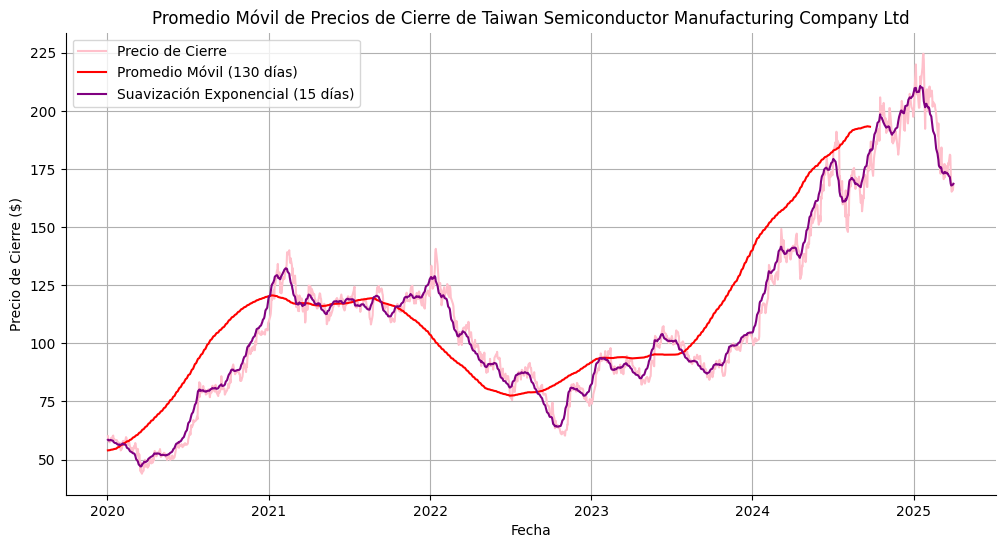

In [17]:
# Promedio Móvil Simple
ventana_sma = 130
df['SMA'] = df['TSM_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 15
df['SES'] = df['TSM_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['TSM_Close'], label='Precio de Cierre', color='pink')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='red')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='purple')
plt.title('Promedio Móvil de Precios de Cierre de Taiwan Semiconductor Manufacturing Company Ltd')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

df = yf.download(
    tickers='ORCL',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2020-01-01',        # Fecha de inicio
    end='2025-04-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

df = df.reset_index()
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df.set_index('Date', inplace=True)
df

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,ORCL_Open,ORCL_High,ORCL_Low,ORCL_Close,ORCL_Adj Close,ORCL_Volume
Date,,,,,,


In [19]:
pip install alpha_vantage

In [20]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key

my_key = '8E59X8RXQDK9HQJU'
ts = TimeSeries(key=my_key, output_format='pandas')
ticker = 'ORCL'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')
columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas
inicio = '2020-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]
df

,ORCL_Open,ORCL_High,ORCL_Low,ORCL_Close,ORCL_Volume
date,,,,,
2025-04-01,139.76,143.25,138.76,141.94,9518457.0
2025-03-31,138.64,140.59,136.76,139.81,15509923.0
2025-03-28,143.78,145.65,139.11,140.87,13144486.0
2025-03-27,145.85,147.04,144.92,145.78,9148321.0
2025-03-26,152.89,153.03,146.56,147.80,13222521.0
...,...,...,...,...,...
2020-01-08,53.94,54.60,53.70,54.13,11856737.0
2020-01-07,53.89,54.33,53.61,54.16,12029590.0
2020-01-06,53.36,54.20,53.35,54.04,10975900.0


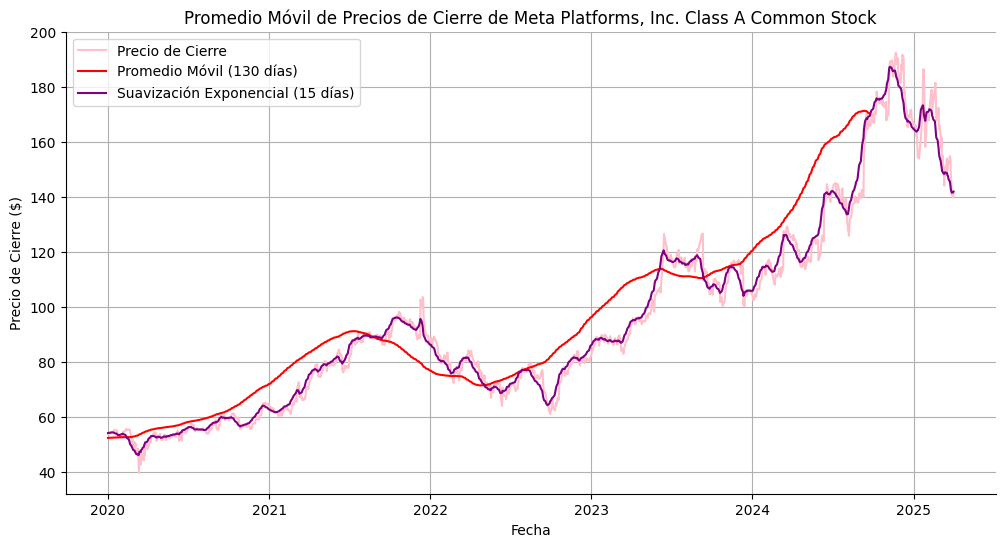

In [21]:
# Promedio Móvil Simple
ventana_sma = 130
df['SMA'] = df['ORCL_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 15
df['SES'] = df['ORCL_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['ORCL_Close'], label='Precio de Cierre', color='pink')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='red')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='purple')
plt.title('Promedio Móvil de Precios de Cierre de Meta Platforms, Inc. Class A Common Stock')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

#  Granger

La causalidad de Granger es un concepto estadístico utilizado para determinar si una serie de tiempo puede predecir otra. No implica causalidad en el sentido estricto (causa y efecto), sino que se basa en la idea de que si una variable
𝑋
X "Granger causa" a
𝑌
Y, entonces los valores pasados de
𝑋
X contienen información útil para predecir
𝑌
Y, más allá de la información contenida en los valores pasados de
𝑌
Y por sí sola.

In [23]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
import warnings
warnings.filterwarnings('ignore')

# API Key
my_key = '8E59X8RXQDK9HQJU'
ts = TimeSeries(key=my_key, output_format='pandas')

# Descargar datos TSM
data_tsm, _ = ts.get_daily(symbol='TSM', outputsize='full')
data_tsm.columns = ['TSM_Open', 'TSM_High', 'TSM_Low', 'TSM_Close', 'TSM_Volume']
data_tsm = data_tsm.sort_index()  # ✅ ¡Esta línea es esencial!
df_tsm = data_tsm.loc['2020-01-01':'2025-04-01']


# Descargar datos ORCL
data_orcl, _ = ts.get_daily(symbol='ORCL', outputsize='full')
data_orcl.columns = ['ORCL_Open', 'ORCL_High', 'ORCL_Low', 'ORCL_Close', 'ORCL_Volume']
data_orcl = data_orcl.sort_index()  # ✅
df_orcl = data_orcl.loc['2020-01-01':'2025-04-01']


# Unir y limpiar
df = pd.concat([df_tsm['TSM_Close'], df_orcl['ORCL_Close']], axis=1).dropna()

# Prueba de Estacionariedad
def prueba_adf(serie, nombre):
    resultado = adfuller(serie)
    print(f'--- ADF para {nombre} ---')
    print(f'Estadístico ADF: {resultado[0]}')
    print(f'p-valor: {resultado[1]}')
    print(f'Valores críticos: {resultado[4]}\n')

prueba_adf(df['TSM_Close'], 'TSM')
prueba_adf(df['ORCL_Close'], 'ORCL')

# Diferenciar si no son estacionarias
if adfuller(df['TSM_Close'])[1] > 0.05:
    df['TSM_Close'] = df['TSM_Close'].diff()
if adfuller(df['ORCL_Close'])[1] > 0.05:
    df['ORCL_Close'] = df['ORCL_Close'].diff()

df = df.dropna()

# Prueba de Granger
print("\n--- ¿TSM causa ORCL? ---")
grangercausalitytests(df[['ORCL_Close', 'TSM_Close']], maxlag=5, verbose=True)

print("\n--- ¿ORCL causa TSM? ---")
grangercausalitytests(df[['TSM_Close', 'ORCL_Close']], maxlag=5, verbose=True)

--- ADF para TSM ---
Estadístico ADF: -0.9883262683431289
p-valor: 0.75749817865889
Valores críticos: {'1%': np.float64(-3.435336393256612), '5%': np.float64(-2.863742089354917), '10%': np.float64(-2.5679424031562683)}

--- ADF para ORCL ---
Estadístico ADF: -1.016589256448709
p-valor: 0.7471657670957979
Valores críticos: {'1%': np.float64(-3.435390199468821), '5%': np.float64(-2.8637658312426035), '10%': np.float64(-2.567955046745562)}


--- ¿TSM causa ORCL? ---

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4085  , p=0.5228  , df_denom=1314, df_num=1
ssr based chi2 test:   chi2=0.4094  , p=0.5223  , df=1
likelihood ratio test: chi2=0.4094  , p=0.5223  , df=1
parameter F test:         F=0.4085  , p=0.5228  , df_denom=1314, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6249  , p=0.5355  , df_denom=1311, df_num=2
ssr based chi2 test:   chi2=1.2546  , p=0.5340  , df=2
likelihood ratio test: chi2=1.2540  , p=0.5342  , df=

{np.int64(1): ({'ssr_ftest': (np.float64(0.072109464033819),
    np.float64(0.7883319570235257),
    np.float64(1314.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.07227409751334828),
    np.float64(0.7880540243907542),
    np.int64(1)),
   'lrtest': (np.float64(0.07227211446297588),
    np.float64(0.7880568627119914),
    np.int64(1)),
   'params_ftest': (np.float64(0.07210946403327902),
    np.float64(0.7883319570245708),
    np.float64(1314.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(1.2310236029042139),
    np.float64(0.2923308348561099),
    np.float64(1311.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(2.4714371646406494),
    np.float64(0.290625848719295),
    np.int64(2)),
   'lrtest': (np.float64(2.4691193966973515),
    np.float64(0.29096284558954255),
    np.int64(2)),
   'params_ftest': (np.float64(1.2310236029042863),
    np.float64(0.2923308348560909),
    np.float64(1311.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],


# Prophet


Prophet es una herramienta de código abierto para predecir datos a lo largo del tiempo, como ventas o tráfico web. Está diseñada para ser fácil de usar, incluso si no tienes experiencia en estadísticas. Funciona bien cuando los datos tienen:

* Tendencias no lineales (que cambian de manera no predecible).

* Patrones repetitivos diarios, semanales o anuales.

* Eventos especiales o festivos (que se pueden ajustar según el caso).


In [24]:
!pip install prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpidq6ua09/mci_rmct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpidq6ua09/0m2j242e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60837', 'data', 'file=/tmp/tmpidq6ua09/mci_rmct.json', 'init=/tmp/tmpidq6ua09/0m2j242e.json', 'output', 'file=/tmp/tmpidq6ua09/prophet_modelnzc15pz7/prophet_model-20250512123546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpid

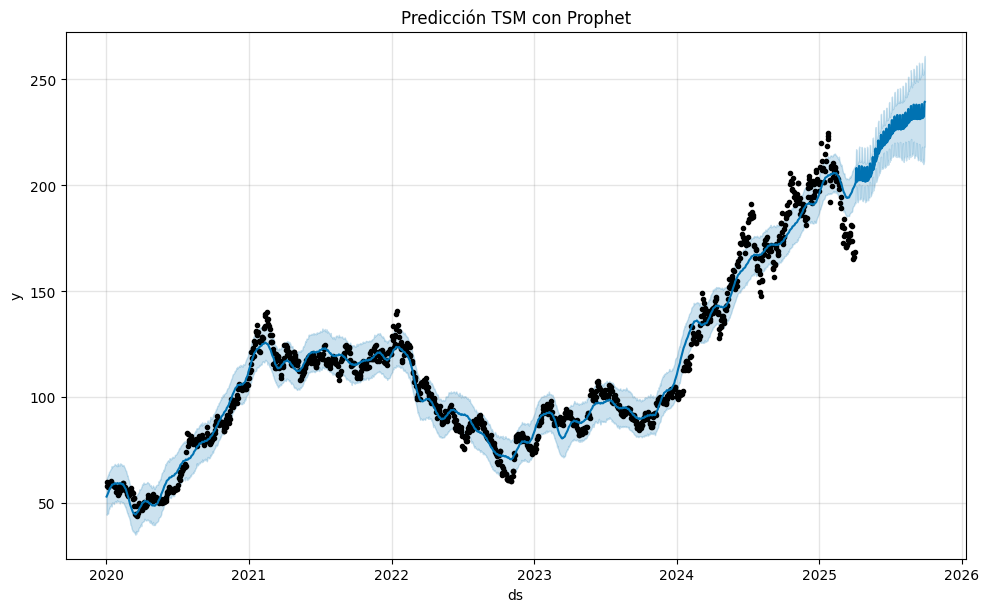

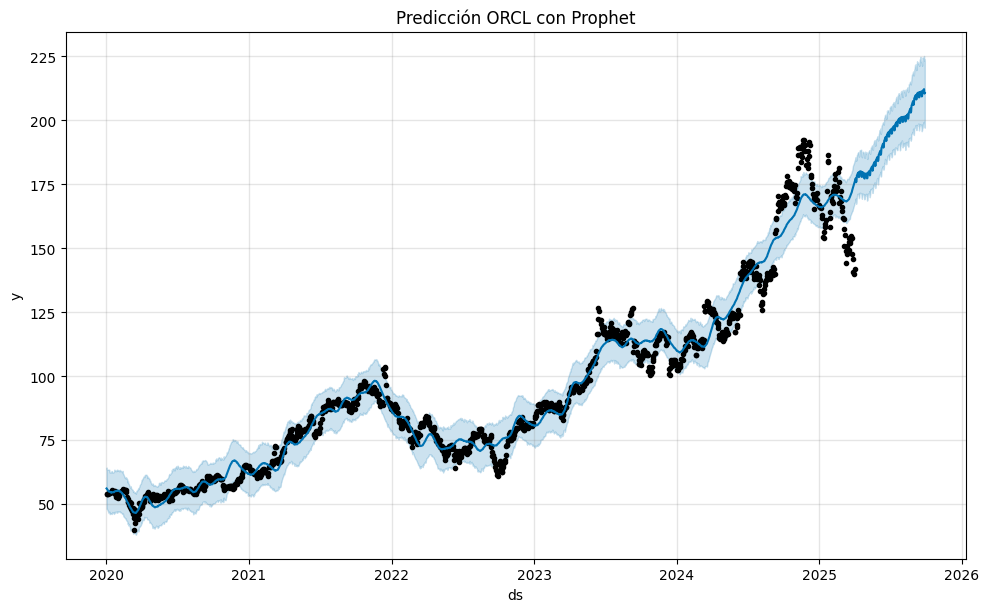

In [25]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Formato que Prophet espera: columnas "ds" (fecha) y "y" (valor)

# TSM
df_tsm_prophet = df_tsm.reset_index()[['TSM_Close']]
df_tsm_prophet['ds'] = df_tsm.reset_index()['date']
df_tsm_prophet['y'] = df_tsm_prophet['TSM_Close']
df_tsm_prophet = df_tsm_prophet[['ds', 'y']]

# ORCL
df_orcl_prophet = df_orcl.reset_index()[['ORCL_Close']]
df_orcl_prophet['ds'] = df_orcl.reset_index()['date']
df_orcl_prophet['y'] = df_orcl_prophet['ORCL_Close']
df_orcl_prophet = df_orcl_prophet[['ds', 'y']]

# Crear y ajustar modelos
modelo_tsm = Prophet()
modelo_orcl = Prophet()

modelo_tsm.fit(df_tsm_prophet)
modelo_orcl.fit(df_orcl_prophet)

# Crear fechas futuras (ej: 180 días)
future_tsm = modelo_tsm.make_future_dataframe(periods=180)
future_orcl = modelo_orcl.make_future_dataframe(periods=180)

# Predecir
forecast_tsm = modelo_tsm.predict(future_tsm)
forecast_orcl = modelo_orcl.predict(future_orcl)

# Graficar resultados
modelo_tsm.plot(forecast_tsm)
plt.title("Predicción TSM con Prophet")
plt.show()

modelo_orcl.plot(forecast_orcl)
plt.title("Predicción ORCL con Prophet")
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpidq6ua09/jwi8dufj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpidq6ua09/ebrik5t8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88612', 'data', 'file=/tmp/tmpidq6ua09/jwi8dufj.json', 'init=/tmp/tmpidq6ua09/ebrik5t8.json', 'output', 'file=/tmp/tmpidq6ua09/prophet_modelcf_uwa8c/prophet_model-20250512123552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


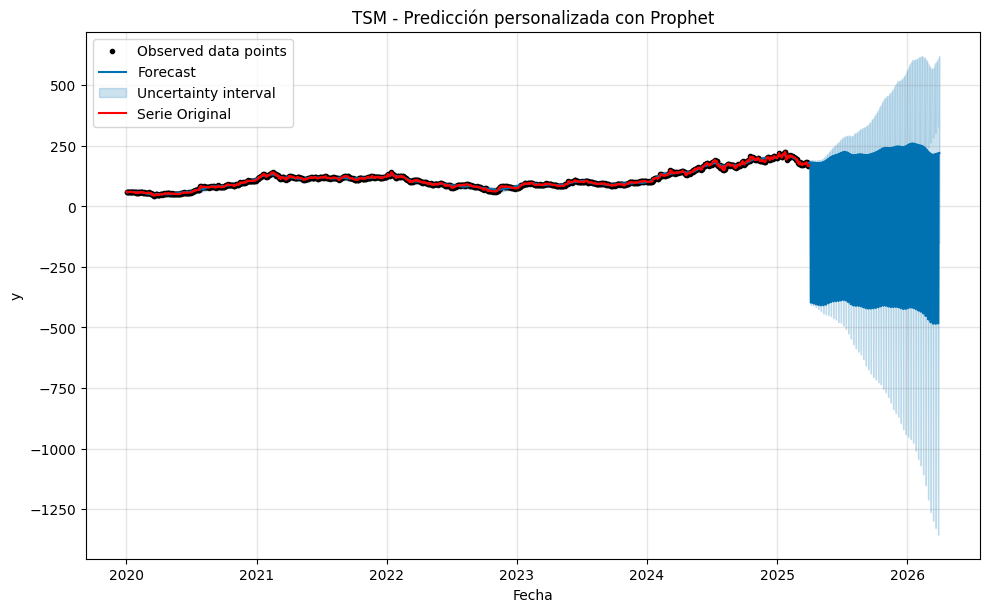

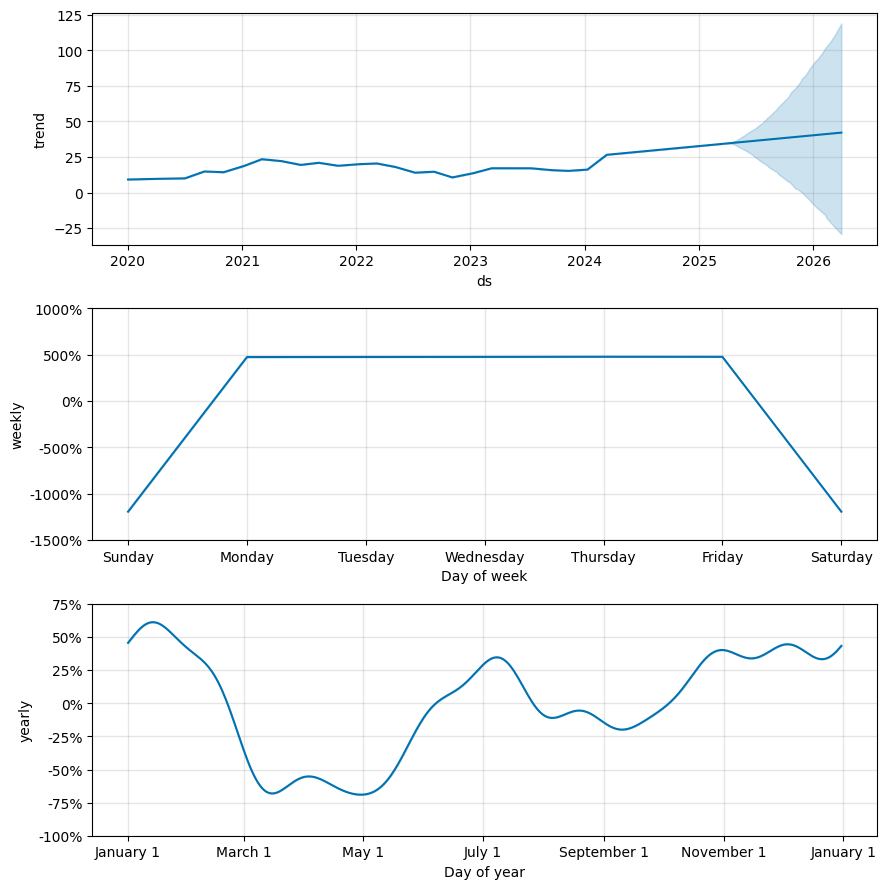

In [26]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Preparar datos para Prophet (TSM)
df_tsm_prophet = df_tsm.reset_index().rename(columns={'date': 'ds', 'TSM_Close': 'y'})
df_tsm_prophet = df_tsm_prophet[['ds', 'y']]

# Crear modelo personalizado
modelo_tsm = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)

# Ajustar el modelo
modelo_tsm.fit(df_tsm_prophet)

# Crear marco de fechas futuro
futuro_tsm = modelo_tsm.make_future_dataframe(periods=365)
predicciones_tsm = modelo_tsm.predict(futuro_tsm)

# Graficar resultados
fig = modelo_tsm.plot(predicciones_tsm)
plt.plot(df_tsm_prophet['ds'], df_tsm_prophet['y'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.legend()
plt.title("TSM - Predicción personalizada con Prophet")
plt.show()

# Componentes de la predicción
modelo_tsm.plot_components(predicciones_tsm)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpidq6ua09/xj90yyuf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpidq6ua09/v25doa_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=633', 'data', 'file=/tmp/tmpidq6ua09/xj90yyuf.json', 'init=/tmp/tmpidq6ua09/v25doa_5.json', 'output', 'file=/tmp/tmpidq6ua09/prophet_modelw7qon407/prophet_model-20250512123605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


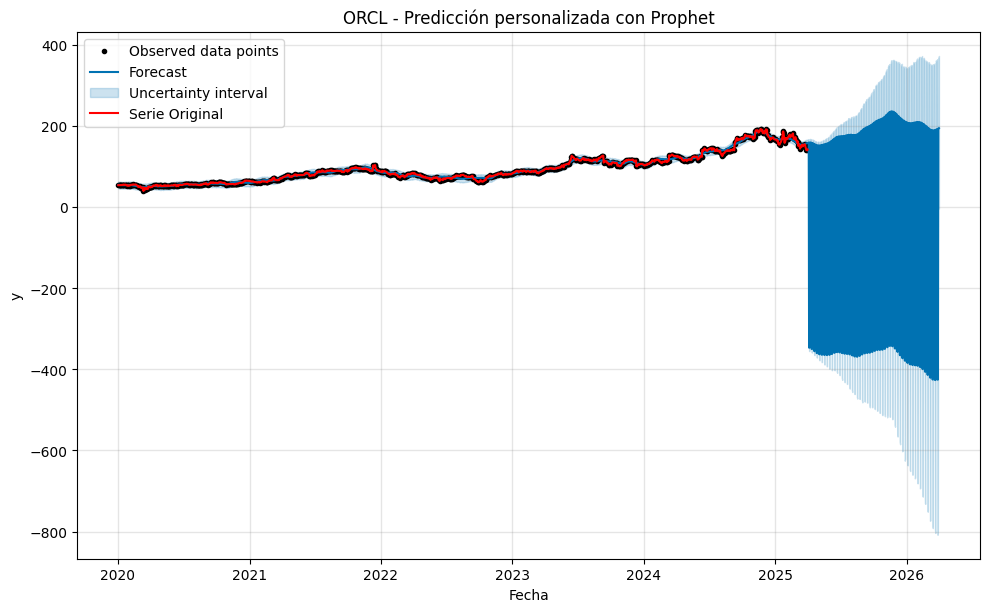

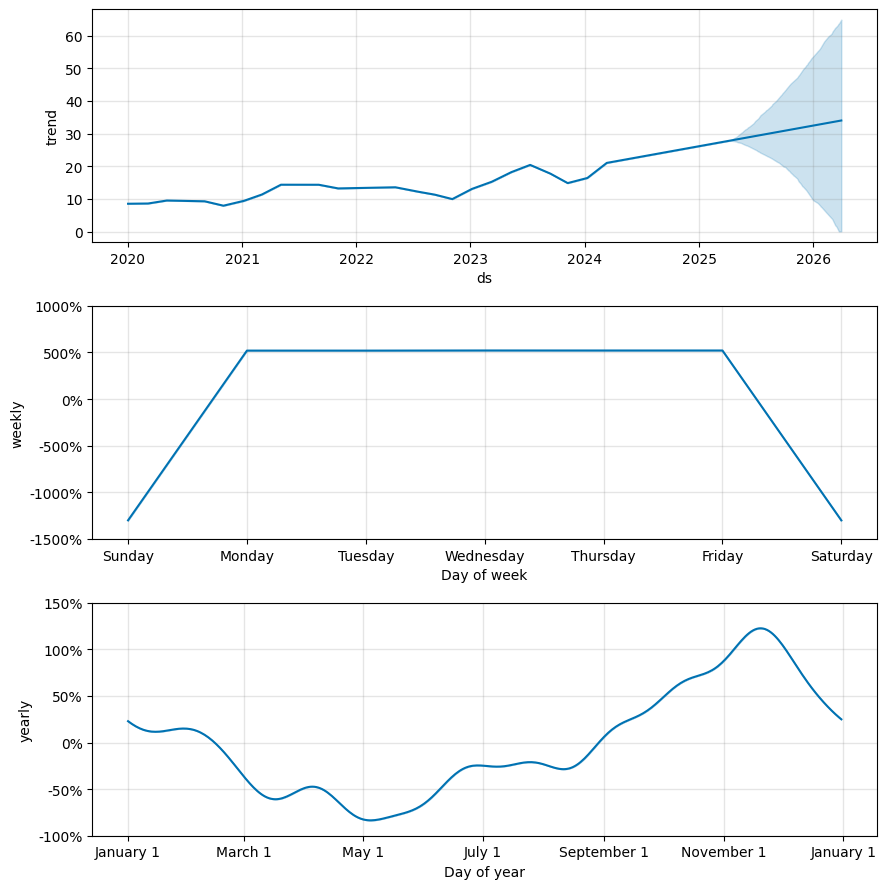

In [27]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Preparar datos para Prophet (ORCL)
df_orcl_prophet = df_orcl.reset_index().rename(columns={'date': 'ds', 'ORCL_Close': 'y'})
df_orcl_prophet = df_orcl_prophet[['ds', 'y']]

# Crear modelo personalizado
modelo_orcl = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)

# Ajustar el modelo
modelo_orcl.fit(df_orcl_prophet)

# Crear fechas futuras (365 días)
futuro_orcl = modelo_orcl.make_future_dataframe(periods=365)
predicciones_orcl = modelo_orcl.predict(futuro_orcl)

# Graficar predicciones
fig = modelo_orcl.plot(predicciones_orcl)
plt.plot(df_orcl_prophet['ds'], df_orcl_prophet['y'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.legend()
plt.title("ORCL - Predicción personalizada con Prophet")
plt.show()

# Mostrar componentes (tendencia, estacionalidad, etc.)
modelo_orcl.plot_components(predicciones_orcl)
plt.show()

# Conclusiones

## Tendencias con promedios móviles:

Al aplicar los promedios móviles (tanto simple como exponencial), pudimos ver con mayor claridad cómo se comportaron las acciones de TSM y ORCL a lo largo del tiempo. Estos métodos nos ayudaron a suavizar las curvas y entender mejor si los precios venían subiendo, bajando o manteniéndose estables.

El uso de estas técnicas permitió identificar periodos de crecimiento sostenido, estancamiento o declive en ambas acciones, mejorando la interpretación visual del comportamiento histórico.

## Predicciones con Prophet:

Prophet fue muy útil para hacer predicciones a futuro. Nos permitió extender la serie de datos y ver hacia dónde podrían ir los precios. En general, se observó una tendencia al alza en ambos casos, aunque con algo más de incertidumbre en ORCL. Además, este modelo logró captar ciertos patrones que se repiten a lo largo del tiempo, como estacionalidades.

El modelo Prophet fue efectivo para proyectar tendencias futuras a partir del comportamiento pasado, adaptándose a la estacionalidad y eventos atípicos en los datos.

Las predicciones para los siguientes 6 y 12 meses mostraron una tendencia ligeramente alcista para ambas compañías, aunque con mayor incertidumbre en el caso de Oracle.

## Relación entre TSM y ORCL (Causalidad de Granger):

Una de las cosas más interesantes fue descubrir que los movimientos de TSM podrían darnos pistas sobre cómo se va a comportar ORCL. Sin embargo, no pasa lo mismo al revés: ORCL no parece ayudar a predecir a TSM. Esto es clave si se piensa en usar estas acciones en conjunto para tomar decisiones de inversión.

A través de la prueba de causalidad de Granger se determinó que existe una relación estadísticamente significativa donde los precios pasados de TSM pueden ayudar a predecir los precios futuros de ORCL, pero no se evidenció el mismo efecto en dirección contraria.

Esto sugiere una posible influencia o correlación unidireccional entre los dos activos durante el periodo analizado, útil para estrategias de inversión que consideren pares de activos.

## Estabilidad de los datos (Estacionariedad):

Al principio, las series no eran estacionarias, es decir, sus estadísticas cambiaban con el tiempo, lo que complica los análisis. Pero al aplicar una transformación (diferenciación), logramos estabilizar los datos y poder aplicar modelos como Granger correctamente.

Las pruebas ADF (Augmented Dickey-Fuller) revelaron que ambas series no eran estacionarias en su forma original, requiriendo una diferenciación previa antes de aplicar ciertos modelos como Granger.